<a href="https://colab.research.google.com/github/kyleha-dev/Springboard/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.Introduction

The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies.

#1.Import Packages


In [61]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [101]:
#
import numpy as np
import pandas as pd
from scipy.stats import randint

#
import matplotlib.pyplot as plt
plt.style.available
import seaborn as sns

#
from sklearn.neighbors import KNeighborsClassifier

#
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet

#
from sklearn.tree import DecisionTreeClassifier

#
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#2.Import Datasets


In [63]:
df = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/Diabetes_healthcare/Data/diabetes.csv')

Data source: https://www.kaggle.com/uciml/pima-indians-diabetes-database


The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

#3.Data Briefing

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [66]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


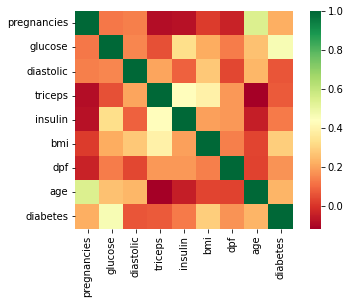

In [67]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

#4.KNN Model
- train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.*italicized text*

In [68]:
df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [69]:
X = df[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']]
y = df[['diabetes']].values.ravel()

In [70]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [71]:
# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

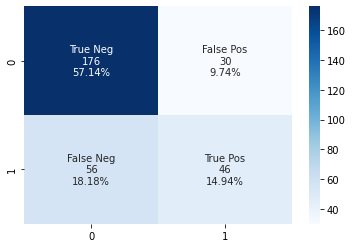

In [72]:
cf_matrix = confusion_matrix(y_test,y_pred)

group_names = ['True Neg', 'False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

The values returned by the confusion matrix are divided into the following categories:
- True Positive (TP): 
The model predicted positive, and the real value is positive.
- True Negative (TN):
The model predicted negative, and the real value is negative.
- False Positive (FP):
The model predicted positive, but the real value is negative (Type I error).
- False Negative (FN):
The model predicted negative, but the real value is positive (Type II error).


In [73]:
# Generate the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



- Accuracy:
The accuracy returns the proportion of correct predictions.
  - Accuracy = (TP + TN)/(TP + TN + FP + FN) = (66 + 40)/(66 + 40 + 1 + 7)
- Precision:
The precision returns the proportion of true positives among all the values predicted as positive.
  - Precision = TP/(TP + FP)
- Recall: The recall returns the proportion of positive values correctly predicted.
  - Recall = TP/(TP + FN)
- Specificity: The specificity returns the proportion of negative values correctly predicted.
  - Specificity: TN/ (TN + FP)
- F1-score: The f1-score is the harmonic mean of precision and recall. It is often used to compare classifiers.
  - F1-score = (2 x Precision x Recall)/(Precision + Recall)
- Support: number of observations for each class.
- Macro average: the arithmetic average of a metric between the two classes.
  - Macro average(precision) = (p0 + p1)/2 
- Weighted average: the weighted average is calculated by dividing sum(metric of interest x weight) by sum(weights).
- Here the weights are the number of observation for each class.
  - Weighted average (precision)= (p0 x s0 + p1 x s1)/(s0 + s1)

https://medium.com/swlh/confusion-matrix-and-classification-report-88105288d48f

Observation: By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance.

#5.Logistic Regression

In [74]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(max_iter=5000)

# Fit the classifier to the training data
logreg = logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

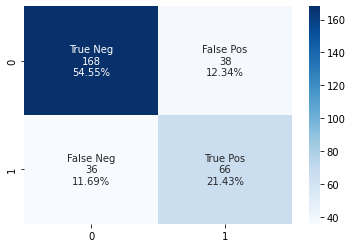

In [75]:
cf_matrix = confusion_matrix(y_test,y_pred)

group_names = ['True Neg', 'False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [76]:
# Compute and print the confusion matrix and classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



#6.ROC Curve
- Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. 

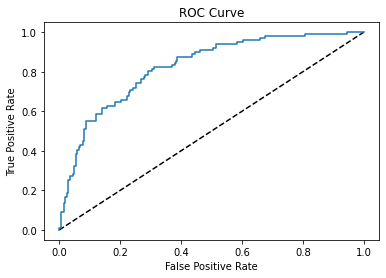

In [77]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [78]:
thresholds

array([1.97235702, 0.97235702, 0.95540248, 0.89075104, 0.87905516,
       0.86626104, 0.86429438, 0.844414  , 0.84441363, 0.83007301,
       0.82456073, 0.79476408, 0.79392306, 0.79155966, 0.7824446 ,
       0.77862097, 0.77630793, 0.76644603, 0.76130911, 0.71488304,
       0.70772265, 0.70323055, 0.70049162, 0.69122832, 0.68388631,
       0.68096741, 0.67510348, 0.67138423, 0.67128078, 0.64695283,
       0.6462141 , 0.6205076 , 0.59887544, 0.58373542, 0.55515421,
       0.54770896, 0.5440545 , 0.53617843, 0.506582  , 0.50128814,
       0.48605246, 0.47203968, 0.44369933, 0.43599961, 0.42355985,
       0.40635765, 0.40625466, 0.40041784, 0.39580115, 0.39229741,
       0.37640399, 0.36726875, 0.35072535, 0.34838758, 0.34236875,
       0.34124317, 0.33913619, 0.33555642, 0.32563121, 0.31316587,
       0.30838251, 0.30589761, 0.30588992, 0.30376829, 0.279825  ,
       0.27427963, 0.26711427, 0.26402038, 0.2565395 , 0.25616816,
       0.25603706, 0.25383442, 0.24199929, 0.2398145 , 0.23601

In [79]:
fpr

array([0.        , 0.        , 0.00485437, 0.00485437, 0.01456311,
       0.01456311, 0.01941748, 0.01941748, 0.02427184, 0.02427184,
       0.02912621, 0.02912621, 0.03398058, 0.03398058, 0.04368932,
       0.04368932, 0.04854369, 0.04854369, 0.05339806, 0.05339806,
       0.05825243, 0.05825243, 0.0631068 , 0.0631068 , 0.06796117,
       0.06796117, 0.0776699 , 0.0776699 , 0.08252427, 0.08252427,
       0.08737864, 0.08737864, 0.12135922, 0.12135922, 0.1407767 ,
       0.1407767 , 0.15533981, 0.15533981, 0.18446602, 0.18446602,
       0.2038835 , 0.2038835 , 0.22330097, 0.22330097, 0.22815534,
       0.22815534, 0.23300971, 0.23300971, 0.24271845, 0.24271845,
       0.25242718, 0.25242718, 0.26699029, 0.26699029, 0.27669903,
       0.27669903, 0.2815534 , 0.2815534 , 0.29126214, 0.29126214,
       0.30582524, 0.30582524, 0.31067961, 0.31067961, 0.36893204,
       0.36893204, 0.37864078, 0.37864078, 0.38349515, 0.38349515,
       0.38834951, 0.38834951, 0.4368932 , 0.4368932 , 0.44660

In [80]:
tpr

array([0.        , 0.00980392, 0.00980392, 0.08823529, 0.08823529,
       0.1372549 , 0.1372549 , 0.16666667, 0.16666667, 0.18627451,
       0.18627451, 0.25490196, 0.25490196, 0.2745098 , 0.2745098 ,
       0.28431373, 0.28431373, 0.32352941, 0.32352941, 0.38235294,
       0.38235294, 0.40196078, 0.40196078, 0.42156863, 0.42156863,
       0.43137255, 0.43137255, 0.45098039, 0.45098039, 0.50980392,
       0.50980392, 0.54901961, 0.54901961, 0.58823529, 0.58823529,
       0.61764706, 0.61764706, 0.62745098, 0.62745098, 0.64705882,
       0.64705882, 0.65686275, 0.65686275, 0.67647059, 0.67647059,
       0.69607843, 0.69607843, 0.70588235, 0.70588235, 0.71568627,
       0.71568627, 0.74509804, 0.74509804, 0.76470588, 0.76470588,
       0.7745098 , 0.7745098 , 0.78431373, 0.78431373, 0.80392157,
       0.80392157, 0.81372549, 0.81372549, 0.82352941, 0.82352941,
       0.83333333, 0.83333333, 0.84313725, 0.84313725, 0.85294118,
       0.85294118, 0.87254902, 0.87254902, 0.89215686, 0.89215

https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0

#7.AUC (Area Under the Curve)

In [81]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test,y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')


print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8243384732533791
AUC scores computed using 5-fold cross-validation: [0.81240741 0.80777778 0.82574074 0.87283019 0.84471698]


- If the AUC is greater than 0.5, the model is better than random guessing.

# 8.Hyperparameter tuning with GridSearchCV

In [91]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [92]:
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=1000)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

In [93]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.7734742381801205


You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation.

#9.Hyperparameter tuning with RandomizedSearchCV
- GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. 
-  Note that RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time.

In [95]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7}
Best score is 0.7474238180120533


- note: Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV

The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.



#10.Hold-out set in practice I: Classification

In [99]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7608695652173914
